In [10]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9537253 sha256=c629c16c1b775da13af4e679d1db760281caa38f061b145944fdb115d38df1a8
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfu

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [14]:
data1 = pd.read_csv("/content/drive/MyDrive/Datasets/Crime Datasets/Chicago_Crimes_2005_to_2007.csv",error_bad_lines=False)
data2 = pd.read_csv("/content/drive/MyDrive/Datasets/Crime Datasets/Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
data3 = pd.read_csv("/content/drive/MyDrive/Datasets/Crime Datasets/Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [15]:
data = pd.concat([data1,data2,data3])

1. Display Top 5 Rows of The Dataset

In [16]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


2. Check Last 5 Rows of The Dataset

In [17]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [18]:
data.shape

(6017767, 23)

In [19]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6017767
Number of Columns 23


4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

5. Check Null Values In The Dataset

In [21]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

6. Select Only The Necessary Columns

In [22]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [23]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [24]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


7.Check Null Values In The Dataset

In [26]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


In [30]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


8. Find The Top 10 Primary Crime Types

In [32]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [33]:
df['Primary Type'].value_counts().head(10)

THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: Primary Type, dtype: int64

9 .How Many Criminals Are Arrested Having Primary Crime type is Theft?

In [34]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

False    1103085
True      141310
Name: Arrest, dtype: int64

10. Find The Top 10 Crime Location Descriptions

In [35]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

In [36]:
df['Location Description'].value_counts().head(10)

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: Location Description, dtype: int64

11 .How Many of Are Arrested Having Location Type is STREET

In [37]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

False    1093718
True      424006
Name: Arrest, dtype: int64

In [38]:
df.index = pd.DatetimeIndex(df.Date)

In [39]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


Text(0, 0.5, 'Number of Crimes')

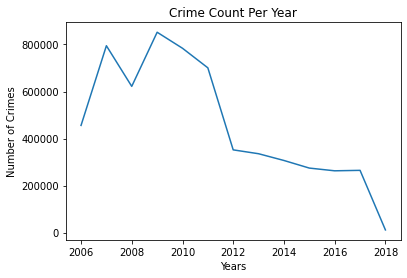

In [40]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

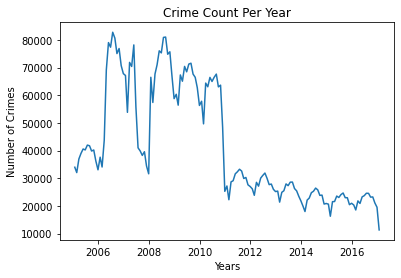

In [41]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Preparing The data

In [42]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [43]:
df_prophet.columns =['Date','Crime Count']

In [44]:
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


Rename The Columns

In [ ]:
# ds and y

In [45]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [46]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


Train The Model

In [47]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Make The Predictions

In [48]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

In [49]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.690793,38385.375829,73238.514233,60513.690793,60513.690793,-4715.521217,-4715.521217,-4715.521217,-4715.521217,-4715.521217,-4715.521217,0.0,0.0,0.0,55798.169577
1,2005-02-28,60381.282930,34088.498638,68638.866428,60381.282930,60381.282930,-9482.220992,-9482.220992,-9482.220992,-9482.220992,-9482.220992,-9482.220992,0.0,0.0,0.0,50899.061938
2,2005-03-31,60234.688510,42246.281678,74689.168944,60234.688510,60234.688510,-1209.393257,-1209.393257,-1209.393257,-1209.393257,-1209.393257,-1209.393257,0.0,0.0,0.0,59025.295253
3,2005-04-30,60092.822942,45044.041248,78647.110548,60092.822942,60092.822942,1173.322203,1173.322203,1173.322203,1173.322203,1173.322203,1173.322203,0.0,0.0,0.0,61266.145146
4,2005-05-31,59946.228522,47999.720725,82839.918899,59946.228522,59946.228522,5476.737864,5476.737864,5476.737864,5476.737864,5476.737864,5476.737864,0.0,0.0,0.0,65422.966386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6973.257780,-9439.682337,26007.253122,6632.392090,7292.114975,1814.046067,1814.046067,1814.046067,1814.046067,1814.046067,1814.046067,0.0,0.0,0.0,8787.303847
165,2018-10-31,6568.154121,-9538.861030,24707.284155,6198.493766,6907.152749,2458.033015,2458.033015,2458.033015,2458.033015,2458.033015,2458.033015,0.0,0.0,0.0,9026.187136
166,2018-11-30,6176.118323,-12481.595704,21327.475863,5782.248046,6540.732776,-2014.178003,-2014.178003,-2014.178003,-2014.178003,-2014.178003,-2014.178003,0.0,0.0,0.0,4161.940320
167,2018-12-31,5771.014664,-16779.875187,15663.067587,5342.990539,6163.024673,-5977.912553,-5977.912553,-5977.912553,-5977.912553,-5977.912553,-5977.912553,0.0,0.0,0.0,-206.897889


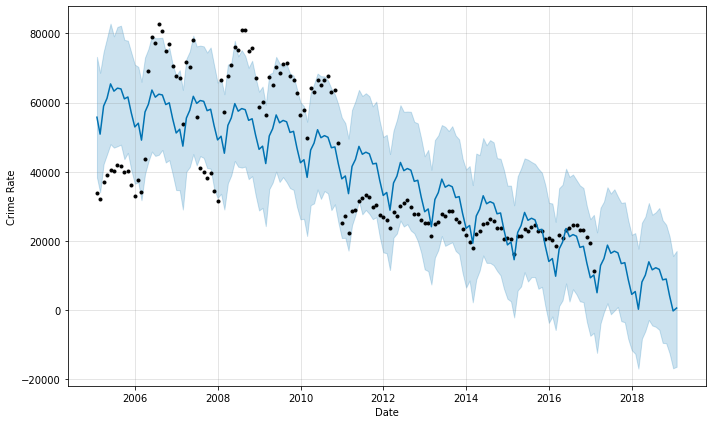

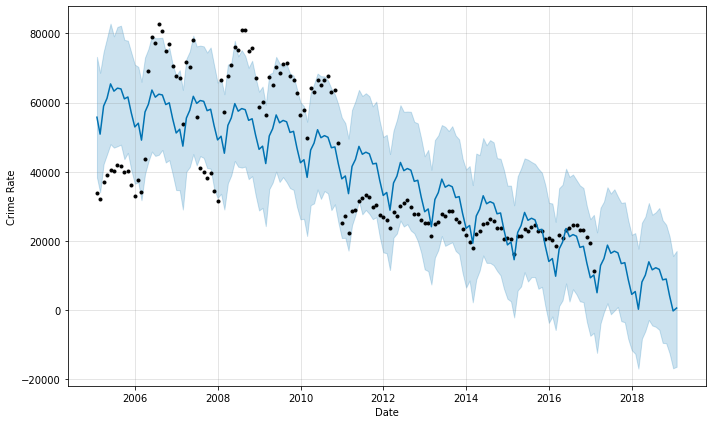

In [50]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

Save The Model

In [51]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [52]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))  # Load model

In [54]:
x = int(input("Enter Numbers Months to forecast"))

Enter Numbers Months to forecast24


In [55]:
pred = m1.make_future_dataframe(periods=x ,freq = "M")
forcast = m1.predict(pred)

In [56]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.690793,38714.093077,73598.146481,60513.690793,60513.690793,-4715.521217,-4715.521217,-4715.521217,-4715.521217,-4715.521217,-4715.521217,0.0,0.0,0.0,55798.169577
1,2005-02-28,60381.282930,34221.984354,66445.150880,60381.282930,60381.282930,-9482.220992,-9482.220992,-9482.220992,-9482.220992,-9482.220992,-9482.220992,0.0,0.0,0.0,50899.061938
2,2005-03-31,60234.688510,42330.638419,77574.168741,60234.688510,60234.688510,-1209.393257,-1209.393257,-1209.393257,-1209.393257,-1209.393257,-1209.393257,0.0,0.0,0.0,59025.295253
3,2005-04-30,60092.822942,44800.781390,77667.125711,60092.822942,60092.822942,1173.322203,1173.322203,1173.322203,1173.322203,1173.322203,1173.322203,0.0,0.0,0.0,61266.145146
4,2005-05-31,59946.228522,49415.019742,82277.678815,59946.228522,59946.228522,5476.737864,5476.737864,5476.737864,5476.737864,5476.737864,5476.737864,0.0,0.0,0.0,65422.966386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6973.257780,-8129.804556,24773.950976,6654.289001,7311.151478,1814.046067,1814.046067,1814.046067,1814.046067,1814.046067,1814.046067,0.0,0.0,0.0,8787.303847
165,2018-10-31,6568.154121,-7037.400065,25582.775847,6224.737765,6931.684621,2458.033015,2458.033015,2458.033015,2458.033015,2458.033015,2458.033015,0.0,0.0,0.0,9026.187136
166,2018-11-30,6176.118323,-12689.239208,20326.509629,5806.598113,6560.798312,-2014.178003,-2014.178003,-2014.178003,-2014.178003,-2014.178003,-2014.178003,0.0,0.0,0.0,4161.940320
167,2018-12-31,5771.014664,-18439.694341,16028.912534,5376.130428,6187.702188,-5977.912553,-5977.912553,-5977.912553,-5977.912553,-5977.912553,-5977.912553,0.0,0.0,0.0,-206.897889


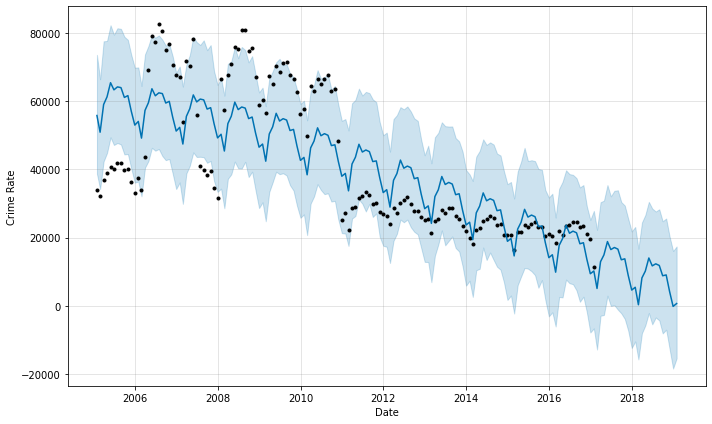

In [57]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')